In [1]:
# sc.stop()

In [2]:
import os
os.getcwd()
os.chdir("/mnt/workspace/Public-DSC291/notebooks/Section2-PCA/Full_Dataset_analysis")
os.getcwd()

'/mnt/workspace/Public-DSC291/notebooks/Section2-PCA/Full_Dataset_analysis'

In [3]:
from Startup import *
print('df has %d rows, stations has %d rows'%(df.count(),stations.count()))

finished standard imports
dict_items([('spark.app.name', 'Weather_PCA'), ('spark.cores.max', '4'), ('spark.logConf', 'True'), ('spark.default.parallelism', '10'), ('spark.executor.cores', '1'), ('spark.executor.memory', '3g')])
started SparkContext and SQLContext in 15.13 seconds
loaded weather.parquet in 7.94 seconds
loaded stations.parquet in 0.23 seconds
registered dataframes as tables in 0.24 seconds
df has 9358394 rows, stations has 85284 rows


In [4]:
%%time
query="""
SELECT stations.ID, stations.elevation, stations.state
FROM stations
WHERE stations.state='CA'
"""
print(query)
CA_df=sqlContext.sql(query)
sqlContext.registerDataFrameAsTable(CA_df,'CA_df')
CA_pdf=CA_df.toPandas()

query="""
SELECT stations.ID, stations.elevation, stations.state
FROM stations
WHERE stations.state='WA'
"""
print(query)
WA_df=sqlContext.sql(query)
sqlContext.registerDataFrameAsTable(WA_df,'WA_df')
WA_pdf=WA_df.toPandas()


SELECT stations.ID, stations.elevation, stations.state
FROM stations
WHERE stations.state='CA'


SELECT stations.ID, stations.elevation, stations.state
FROM stations
WHERE stations.state='WA'

CPU times: user 44 ms, sys: 4 ms, total: 48 ms
Wall time: 879 ms


In [5]:
%%time
query="""
SELECT year,COUNT(year) AS count
FROM weather  
GROUP BY year 
ORDER BY year
"""
print(query)
year_pdf=sqlContext.sql(query).toPandas()
year_pdf


SELECT year,COUNT(year) AS count
FROM weather  
GROUP BY year 
ORDER BY year

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 8.85 s


In [6]:
%%time
query="""
SELECT stations.ID, stations.elevation, stations.state, 
        weather.Station, weather.Measurement, weather.Year, weather.Values
FROM stations
LEFT JOIN weather
ON stations.ID = weather.Station
WHERE stations.state='CA' AND weather.Measurement='SNOW'
"""

print(query)
CA_SNOW_df=sqlContext.sql(query)
CA_SNOW_pdf=CA_SNOW_df.toPandas()
sqlContext.registerDataFrameAsTable(CA_SNOW_df,'CA_SNOW_df')


SELECT stations.ID, stations.elevation, stations.state, 
        weather.Station, weather.Measurement, weather.Year, weather.Values
FROM stations
LEFT JOIN weather
ON stations.ID = weather.Station
WHERE stations.state='CA' AND weather.Measurement='SNOW'

CPU times: user 508 ms, sys: 40 ms, total: 548 ms
Wall time: 31 s


In [7]:
%%time
query="""
SELECT stations.ID, stations.elevation, stations.state, 
        weather.Station, weather.Measurement, weather.Year, weather.Values
FROM stations
LEFT JOIN weather
ON stations.ID = weather.Station
WHERE stations.state='WA' AND weather.Measurement='SNOW'
"""

print(query)
WA_SNOW_df=sqlContext.sql(query)
WA_SNOW_pdf=WA_SNOW_df.toPandas()
sqlContext.registerDataFrameAsTable(WA_SNOW_df,'WA_SNOW_df')


SELECT stations.ID, stations.elevation, stations.state, 
        weather.Station, weather.Measurement, weather.Year, weather.Values
FROM stations
LEFT JOIN weather
ON stations.ID = weather.Station
WHERE stations.state='WA' AND weather.Measurement='SNOW'

CPU times: user 224 ms, sys: 16 ms, total: 240 ms
Wall time: 19.2 s


In [8]:
CA_SNOW_copy = CA_SNOW_pdf.copy()
WA_SNOW_copy = WA_SNOW_pdf.copy()

### Remove all zero rows

In [9]:
print(CA_SNOW_pdf.count())
CA_SNOW_pdf = CA_SNOW_pdf[CA_SNOW_pdf.apply(lambda x: any(x['Values']), axis=1)]
CA_SNOW_pdf = CA_SNOW_pdf[CA_SNOW_pdf.apply(lambda x: len(x['Values']) > 300, axis=1)]
print(CA_SNOW_pdf.count())

print(WA_SNOW_pdf.count())
WA_SNOW_pdf = WA_SNOW_pdf[WA_SNOW_pdf.apply(lambda x: any(x['Values']), axis=1)]
WA_SNOW_pdf = WA_SNOW_pdf[WA_SNOW_pdf.apply(lambda x: len(x['Values']) > 300, axis=1)]
print(WA_SNOW_pdf.count())

ID             43901
elevation      43901
state          43901
Station        43901
Measurement    43901
Year           43901
Values         43901
dtype: int64
ID             28292
elevation      28292
state          28292
Station        28292
Measurement    28292
Year           28292
Values         28292
dtype: int64
ID             21170
elevation      21170
state          21170
Station        21170
Measurement    21170
Year           21170
Values         21170
dtype: int64
ID             20478
elevation      20478
state          20478
Station        20478
Measurement    20478
Year           20478
Values         20478
dtype: int64


### Data v.s. Year distribution

[(1879, 1), (1889, 1), (1890, 1), (1891, 1), (1892, 2), (1893, 19), (1894, 22), (1895, 21), (1896, 34), (1897, 28), (1898, 33), (1899, 39), (1900, 29), (1901, 31), (1902, 36), (1903, 65), (1904, 39), (1905, 57), (1906, 76), (1907, 110), (1908, 83), (1909, 135), (1910, 172), (1911, 163), (1912, 159), (1913, 137), (1914, 98), (1915, 129), (1916, 182), (1917, 160), (1918, 166), (1919, 125), (1920, 84), (1921, 88), (1922, 141), (1923, 106), (1924, 167), (1925, 164), (1926, 157), (1927, 161), (1928, 167), (1929, 184), (1930, 197), (1931, 149), (1932, 216), (1933, 182), (1934, 117), (1935, 206), (1936, 223), (1937, 200), (1938, 219), (1939, 228), (1940, 219), (1941, 217), (1942, 262), (1943, 318), (1944, 305), (1945, 266), (1946, 229), (1947, 288), (1948, 623), (1949, 493), (1950, 375), (1951, 354), (1952, 356), (1953, 343), (1954, 315), (1955, 391), (1956, 362), (1957, 455), (1958, 320), (1959, 362), (1960, 366), (1961, 322), (1962, 463), (1963, 304), (1964, 352), (1965, 331), (1966, 273), 

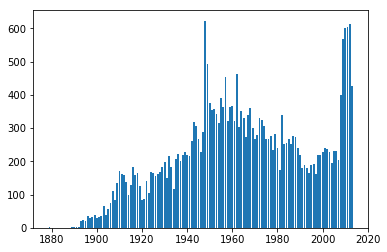

[(1890, 1), (1891, 4), (1892, 6), (1893, 27), (1894, 41), (1895, 42), (1896, 46), (1897, 46), (1898, 50), (1899, 64), (1900, 66), (1901, 67), (1902, 69), (1903, 71), (1904, 74), (1905, 82), (1906, 81), (1907, 87), (1908, 80), (1909, 105), (1910, 112), (1911, 115), (1912, 115), (1913, 121), (1914, 138), (1915, 147), (1916, 154), (1917, 155), (1918, 146), (1919, 144), (1920, 142), (1921, 135), (1922, 140), (1923, 136), (1924, 140), (1925, 138), (1926, 162), (1927, 166), (1928, 158), (1929, 172), (1930, 186), (1931, 174), (1932, 178), (1933, 189), (1934, 190), (1935, 193), (1936, 195), (1937, 199), (1938, 193), (1939, 196), (1940, 193), (1941, 163), (1942, 198), (1943, 200), (1944, 166), (1945, 186), (1946, 195), (1947, 192), (1948, 220), (1949, 230), (1950, 223), (1951, 227), (1952, 213), (1953, 173), (1954, 215), (1955, 216), (1956, 216), (1957, 217), (1958, 176), (1959, 213), (1960, 213), (1961, 203), (1962, 218), (1963, 198), (1964, 214), (1965, 204), (1966, 196), (1967, 183), (1968, 

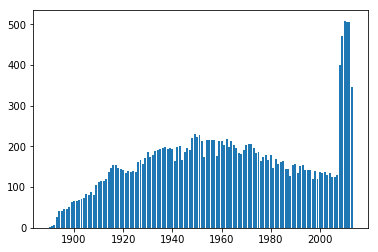

126 124
0 0


In [10]:
years = list(range(1763, 2014))
tca = CA_SNOW_pdf.loc[(CA_SNOW_pdf['Year'].isin(years))]
twa = WA_SNOW_pdf.loc[(WA_SNOW_pdf['Year'].isin(years))]

from collections import Counter
import matplotlib.pyplot as plt

c1 = sorted(Counter(tca['Year'].tolist()).items())
c2 = sorted(Counter(twa['Year'].tolist()).items())

print(c1)

plt.bar([c[0] for c in c1], [c[1] for c in c1])
plt.show()

print(c2)

plt.bar([c[0] for c in c2], [c[1] for c in c2])
plt.show()

print(len(c1), len(c2))
l1, l2 = [], []
for k in c1:
    if k[1] == 79:
        l1.append(k[0])
for k in c2:
    if k[1] == 79:
        l2.append(k)
print(len(l1), len(l2))

### Keep stations that has data across certain year range

In [11]:
years = list(range(1970, 2000))
tca = CA_SNOW_pdf.loc[(CA_SNOW_pdf['Year'].isin(years))]
twa = WA_SNOW_pdf.loc[(WA_SNOW_pdf['Year'].isin(years))]

c1 = Counter(tca['ID'].tolist())
c2 = Counter(twa['ID'].tolist())

print(len(c1), len(c2))
l1, l2 = [], []
for k in c1:
    if c1[k] == len(years):
        l1.append(k)
for k in c2:
    if c2[k] == len(years):
        l2.append(k)
print(len(l1), len(l2))

miniTca = tca.loc[(tca['ID'].isin(l1))]
miniTwa = twa.loc[(twa['ID'].isin(l2))]

736 245
51 67


In [12]:
import numpy
import pandas

def f1(row):
    return row['Values'][:181]

def f2(row):
    return row['Values'][181:]

def Jan2Jun(df):
    df_first = df.copy()
    df_first['V_first'] = df_first.apply(f1, axis=1)
    df_first['Year'] = df_first.apply(lambda x: x['Year']-1, axis=1)
    df_second = df.copy()
    df_second['V_second'] = df_second.apply(f2, axis=1)
    df_second = df_second.drop(['elevation', 'state', 'Station', 'Measurement', 'Values'], axis=1)
    result = pandas.merge(df_first, df_second, on=['ID', 'Year'], how='inner')
    result['Values'] = result.apply(lambda x: x['V_second'] + x['V_first'], axis=1)
    return result.drop(['V_second', 'V_first'], axis=1)
    

dca = Jan2Jun(miniTca)
dwa = Jan2Jun(miniTwa)
print(dca, dwa)

               ID  elevation state      Station Measurement  Year  \
0     USC00042239     1414.3    CA  USC00042239        SNOW  1970   
1     USC00042239     1414.3    CA  USC00042239        SNOW  1971   
2     USC00042239     1414.3    CA  USC00042239        SNOW  1972   
3     USC00042239     1414.3    CA  USC00042239        SNOW  1973   
4     USC00042239     1414.3    CA  USC00042239        SNOW  1974   
5     USC00042239     1414.3    CA  USC00042239        SNOW  1975   
6     USC00042239     1414.3    CA  USC00042239        SNOW  1976   
7     USC00042239     1414.3    CA  USC00042239        SNOW  1977   
8     USC00042239     1414.3    CA  USC00042239        SNOW  1978   
9     USC00042239     1414.3    CA  USC00042239        SNOW  1979   
10    USC00042239     1414.3    CA  USC00042239        SNOW  1980   
11    USC00042239     1414.3    CA  USC00042239        SNOW  1981   
12    USC00042239     1414.3    CA  USC00042239        SNOW  1982   
13    USC00042239     1414.3    CA

## Now start with dca and dwa as CA and WA data respectively

## Jennifer's PCA work

In [13]:
%%time
dca_sql_table = sqlContext.createDataFrame(dca)

CPU times: user 128 ms, sys: 8 ms, total: 136 ms
Wall time: 173 ms


In [14]:
df.show()

+-----------+-----------+----+--------------------+
|    Station|Measurement|Year|              Values|
+-----------+-----------+----+--------------------+
|USW00093819|       WDFM|1972|[38 58 EC 5C 38 5...|
|USW00093819|       WDFM|1973|[38 5C EC 5C 08 5...|
|USW00093819|       WDFM|1974|[EC 5C A0 51 EC 5...|
|USW00093819|       WDFM|1975|[EC 5C 38 58 38 5...|
|USW00093819|       WDFM|1976|[38 58 38 58 38 5...|
|USW00093819|       WDFM|1977|[EC 5C 38 5C A0 5...|
|USW00093819|       WDFM|1978|[38 5C 08 5B EC 5...|
|USW00093819|       WDFM|1979|[EC 5C 38 5C 08 5...|
|USW00093819|       WESD|1952|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1953|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1954|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1955|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1956|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1957|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1958|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1959|[00 7E 00 7E 00 7...|
|USW00093819

In [15]:
print(type(df))
print(type(dca_sql_table))

from pyspark.sql.types import *

dca_sql_table.show()

sqlContext.registerDataFrameAsTable(dca_sql_table,'dca_sql_table')

<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pyspark.sql.dataframe.DataFrame'>
+-----------+---------+-----+-----------+-----------+----+--------------------+
|         ID|elevation|state|    Station|Measurement|Year|              Values|
+-----------+---------+-----+-----------+-----------+----+--------------------+
|USC00042239|   1414.3|   CA|USC00042239|       SNOW|1970|[00 00 00 00 00 0...|
|USC00042239|   1414.3|   CA|USC00042239|       SNOW|1971|[00 00 00 00 00 0...|
|USC00042239|   1414.3|   CA|USC00042239|       SNOW|1972|[00 00 00 00 00 0...|
|USC00042239|   1414.3|   CA|USC00042239|       SNOW|1973|[00 00 00 00 00 0...|
|USC00042239|   1414.3|   CA|USC00042239|       SNOW|1974|[00 00 00 00 00 0...|
|USC00042239|   1414.3|   CA|USC00042239|       SNOW|1975|[4D 00 00 00 00 0...|
|USC00042239|   1414.3|   CA|USC00042239|       SNOW|1976|[00 00 00 00 00 0...|
|USC00042239|   1414.3|   CA|USC00042239|       SNOW|1977|[00 00 00 00 00 0...|
|USC00042239|   1414.3|   CA|USC0004

In [16]:
from numpy import linalg as LA
import numpy as np

from numpy_pack import packArray,unpackArray
from spark_PCA import computeCov
from time import time

def computeStatistics(sqlContext,df,measurements=['TMAX', 'SNOW', 'SNWD', 'TMIN', 'PRCP', 'TOBS']):
    """Compute all of the statistics for a given dataframe
    Input: sqlContext: to perform SQL queries
            df: dataframe with the fields 
            Station(string), Measurement(string), Year(integer), Values (byteArray with 365 float16 numbers)
            measurements= a list of measurement types for which we want to do the analysis
    returns: STAT, a dictionary of dictionaries. First key is measurement, 
             second keys described in computeStats.STAT_Descriptions
    """

    sqlContext.registerDataFrameAsTable(df,'weather')
    STAT={}  # dictionary storing the statistics for each measurement
    
    for meas in measurements:
        t=time()
        Query="SELECT * FROM weather\n\tWHERE measurement = '%s'"%(meas)
        mdf = sqlContext.sql(Query)
        print(meas,': shape of mdf is ',mdf.count())

        data=mdf.rdd.map(lambda row: unpackArray(row['Values'],np.float16))
#         print("data: " + str(data.collect()))

        #Compute basic statistics
        STAT[meas]=computeOverAllDist(data)   # Compute the statistics 

        # compute covariance matrix
        OUT=computeCov(data)
        cov=OUT['Cov']
        cov=np.nan_to_num(cov)
        #find PCA decomposition
        eigval,eigvec=LA.eig(cov)

        # collect all of the statistics in STAT[meas]
        STAT[meas]['eigval']=eigval
        STAT[meas]['eigvec']=eigvec
        STAT[meas].update(OUT)

        print('time for',meas,'is',time()-t)
    
    return STAT

# Compute the overall distribution of values and the distribution of the number of nan per year
def find_percentiles(SortedVals,percentile):
    L=int(len(SortedVals)/percentile)
    return SortedVals[L],SortedVals[-L]
  
def computeOverAllDist(rdd0):
    UnDef=np.array(rdd0.map(lambda row:sum(np.isnan(row))).sample(False,0.01).collect())
    flat=rdd0.flatMap(lambda v:list(v)).filter(lambda x: not np.isnan(x)).cache()
    count,S1,S2=flat.map(lambda x: np.float64([1,x,x**2]))\
                  .reduce(lambda x,y: x+y)
    mean=S1/count
    
    print("S1: " + str(S1))
    print("S2: " + str(S2))
    print("count: " +str(count))
    print("mean: " + str(mean))
    
    std=np.sqrt(S2/count-mean**2)
    Vals=flat.sample(False,0.0001).collect()
    SortedVals=np.array(sorted(Vals))
    low100,high100=find_percentiles(SortedVals,100)
    low1000,high1000=find_percentiles(SortedVals,1000)
    return {'UnDef':UnDef,\
          'mean':mean,\
          'std':std,\
          'SortedVals':SortedVals,\
          'low100':low100,\
          'high100':high100,\
          'low1000':low100,\
          'high1000':high1000
          }

# description of data returned by computeOverAllDist
STAT_Descriptions=[
('SortedVals', 'Sample of values', 'vector whose length varies between measurements'),
 ('UnDef', 'sample of number of undefs per row', 'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))
]

In [17]:
%%time
STAT_CA = computeStatistics(sqlContext, dca_sql_table, measurements=['SNOW'])

SNOW : shape of mdf is  1479
S1: inf
S2: inf
count: 539832.0
mean: inf


/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/ipykernel/__main__.py:65: RuntimeWarning: invalid value encountered in double_scalars


time for SNOW is 12.34967827796936
CPU times: user 400 ms, sys: 36 ms, total: 436 ms
Wall time: 12.4 s


/mnt/workspace/Public-DSC291/notebooks/Section2-PCA/PCA/lib/spark_PCA.py:36: RuntimeWarning: invalid value encountered in subtract
  Cov=O/NO - np.outer(Mean,Mean)


## okay, so since the prof's PCA didn't work let's try using sklearn's PCA
## first, clean the data of nans and too large values

In [18]:
## https://stackoverflow.com/questions/23282130/principal-components-analysis-using-pandas-dataframe

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# df = pd.DataFrame(data=np.random.normal(0, 1, (20, 10)))
# print(dca.shape) ## (1479, 7)

def unpackData(row):
    row = row.to_frame()
    L = list(row.transpose()['Values'])
    asf = np.stack([unpackArray(v, np.float16) for v in L])
    return asf[0].tolist()

dca['unpackedValues']=dca.apply(lambda row: unpackData(row), axis=1)
dca.head()

dca_values = pd.DataFrame(dca.unpackedValues.tolist(), index=dca.index)

print(type(dca_values))

# dca_values.dtypes

df1 = dca_values[dca_values.isnull().any(axis=1)]
# df1.head()

dca_values_clean = dca_values
dca_values_clean = dca_values_clean.drop(dca_values_clean.index[452])
dca_values_clean = dca_values_clean.drop(dca_values_clean.index[712])
dca_values_clean = dca_values_clean.drop(dca_values_clean.index[824])

print(dca_values.shape)
print(dca_values_clean.shape)

df1 = dca_values_clean[dca_values_clean.isnull().any(axis=1)]
print(df1)

dca_values_clean = dca_values_clean.drop(dca_values_clean.index[822])


<class 'pandas.core.frame.DataFrame'>
(1479, 365)
(1476, 365)
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 365 columns]


In [19]:
np.where(dca_values_clean.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [20]:
pca = PCA(n_components=365)
pca.fit(dca_values_clean)

PCA(copy=True, iterated_power='auto', n_components=365, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
pca.components_

array([[  3.09657820e-03,  -2.63107958e-03,  -1.59696333e-02, ...,
         -2.52549080e-02,   9.36447433e-03,  -1.80158660e-02],
       [  1.97112100e-03,  -8.53795824e-03,  -2.28391336e-02, ...,
         -3.37381912e-02,  -5.30360033e-03,  -2.46509262e-02],
       [  9.15060554e-04,  -2.82016387e-03,   6.28751216e-03, ...,
         -1.22034918e-02,   5.11711609e-03,   4.80724276e-02],
       ..., 
       [  0.00000000e+00,   2.13687437e-17,   5.77632650e-17, ...,
         -3.04828930e-17,  -2.02648871e-17,   3.04363980e-17],
       [ -0.00000000e+00,   9.10715578e-17,   8.76964892e-17, ...,
          3.23222178e-17,   1.74724956e-17,   2.22781246e-17],
       [ -0.00000000e+00,  -2.18931800e-17,  -6.25237548e-17, ...,
         -4.44322147e-17,   2.55294911e-17,   2.50552849e-17]])

## let's graph the cumulative pca components by the explained variance

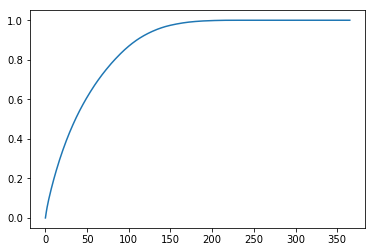

In [22]:
y = [0]

for v in pca.explained_variance_ratio_:
    y.append(v+y[-1])

import matplotlib.pyplot as plt
plt.plot(y)
plt.show()

## ruh-roh that doesnt look so great for finding helpful components.
## maybe I should include the year?

In [23]:
dca_values = pd.DataFrame(dca.unpackedValues.tolist(), index=dca.index)
result = pd.concat([dca['Year'], dca_values], axis=1).reindex(dca_values.index)
result.head()

,Year,0,1,2,3,4,5,6,7,8,...,355,356,357,358,359,360,361,362,363,364
0,1970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,1971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,1972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000005,0.0,0.0,-0.0,0.000004,0.0,0.0,0.000005,0.0,0.0
3,1973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,1974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [24]:
# filter out nans

import pandas as pd

result = pd.concat([dca['Year'], dca_values], axis=1).reindex(dca_values.index)
result.head()

result_clean = result
result_clean = result_clean.drop(452)
result_clean = result_clean.drop(713)
result_clean = result_clean.drop(826)

print(result_clean.shape)

remove = result_clean[result_clean.isnull().any(axis=1)]
print(remove.shape)

# # filter out rows with values too big
result_clean.reindex()
print(np.where(result_clean.values >= np.finfo(np.float64).max))

result_clean = result_clean.drop(result_clean.index[822])

print(np.where(result_clean.values >= np.finfo(np.float64).max))

(1476, 366)
(0, 366)
(array([822]), array([301]))
(array([], dtype=int64), array([], dtype=int64))


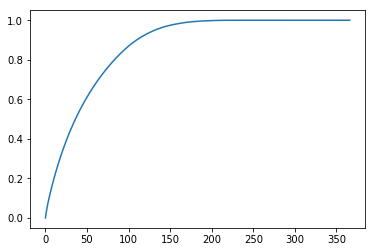

In [25]:
pca = PCA(n_components=366)
pca.fit(result_clean)

y = [0]

for v in pca.explained_variance_ratio_:
    y.append(v+y[-1])

import matplotlib.pyplot as plt
plt.plot(y)
plt.show()

## maybe we should consider el nino years in CA vs not?

In [26]:
## for reference: these are the years used for el nino years
## https://psl.noaa.gov/enso/past_events.html
ca_elnino = result_clean[(result_clean['Year'] == 1972)
               | (result_clean['Year'] == 1977)
               | (result_clean['Year'] == 1979)
               | (result_clean['Year'] == 1982)
               | (result_clean['Year'] == 1986)
               | (result_clean['Year'] == 1987)
               | (result_clean['Year'] == 1991)
               | (result_clean['Year'] == 1994)
               | (result_clean['Year'] == 1997)]
ca_elnino.head()


,Year,0,1,2,3,4,5,6,7,8,...,355,356,357,358,359,360,361,362,363,364
2,1972,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000005,0.0,0.0,-0.000000,0.000004,0.0,0.0,0.000005,0.0,0.0
7,1977,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
9,1979,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000005,0.0,0.0,-2.000000,0.000005,0.0,0.0,0.000000,0.0,0.0
12,1982,512.0,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,512.0,0.000005,0.000000,0.0,0.0,0.000000,0.0,0.0
16,1986,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000005,0.0,-4.0,0.000005,0.000000,0.0,0.0,0.000000,0.0,0.0


In [27]:
remove = ca_elnino[ca_elnino.isnull().any(axis=1)]
print(remove.shape)

print(np.where(ca_elnino.values >= np.finfo(np.float64).max))

(0, 366)
(array([], dtype=int64), array([], dtype=int64))


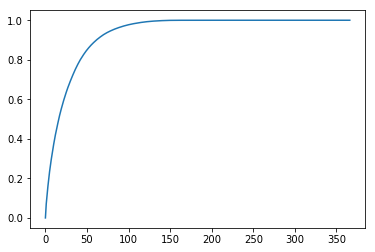

In [28]:
pca = PCA(n_components=366)
pca.fit(ca_elnino)

y = [0]

for v in pca.explained_variance_ratio_:
    y.append(v+y[-1])

import matplotlib.pyplot as plt
plt.plot(y)
plt.show()

## let's try smoothing for CA all years?

In [29]:
dca.head()

,ID,elevation,state,Station,Measurement,Year,Values,unpackedValues
0,USC00042239,1414.3,CA,USC00042239,SNOW,1970,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,USC00042239,1414.3,CA,USC00042239,SNOW,1971,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,USC00042239,1414.3,CA,USC00042239,SNOW,1972,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,USC00042239,1414.3,CA,USC00042239,SNOW,1973,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,USC00042239,1414.3,CA,USC00042239,SNOW,1974,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [30]:
from astropy.convolution import convolve
from scipy import signal
#using astrophy.convolution.convolve and not scipy.signal.convolve because the first can handle nans.

# orig_pdf=df.toPandas()
# orig_pdf.head()

def Smoother(orig_pdf,order=101,std=20):
    window = signal.gaussian(order, std=std)
    window/=sum(window)

    L=list(orig_pdf['Values'])

    orig=np.stack([unpackArray(V,np.float16) for V in L])
    orig_shape=orig.shape
    orig=orig.flatten()

    smoothed = convolve(orig, window)
    smoothed=np.reshape(smoothed,orig_shape)

    #create a new pandas dataframe
    smoothed_pdf=orig_pdf.copy()   # make a copy

    L=[packArray(smoothed[i,:]) for i in range(smoothed.shape[0])]
    smoothed_pdf['Values']=L

    smoothed_pdf.loc[0,'Measurement']

    new_name = 'smooth_'+smoothed_pdf.loc[0,'Measurement']
    smoothed_pdf['Measurement']=new_name
    return smoothed_pdf

smoothed_pdf=Smoother(dca)
smoothed_pdf.head()


def unpackData(row):
    row = row.to_frame()
    L = list(row.transpose()['Values'])
    asf = np.stack([unpackArray(v, np.float16) for v in L])
    return asf[0].tolist()

smoothed_pdf['unpackedValues']=smoothed_pdf.apply(lambda row: unpackData(row), axis=1)
smoothed_pdf.head()

,ID,elevation,state,Station,Measurement,Year,Values,unpackedValues
0,USC00042239,1414.3,CA,USC00042239,smooth_SNOW,1970,"[112, 164, 187, 164, 7, 165, 85, 165, 164, 165...","[-0.017333984375, -0.0184783935546875, -0.0196..."
1,USC00042239,1414.3,CA,USC00042239,smooth_SNOW,1971,"[116, 63, 193, 63, 6, 64, 42, 64, 76, 64, 109,...","[1.86328125, 1.9384765625, 2.01171875, 2.08203..."
2,USC00042239,1414.3,CA,USC00042239,smooth_SNOW,1972,"[228, 38, 51, 39, 129, 39, 205, 39, 11, 40, 47...","[0.02691650390625, 0.0281219482421875, 0.02931..."
3,USC00042239,1414.3,CA,USC00042239,smooth_SNOW,1973,"[52, 73, 8, 73, 217, 72, 170, 72, 121, 72, 72,...","[10.40625, 10.0625, 9.6953125, 9.328125, 8.945..."
4,USC00042239,1414.3,CA,USC00042239,smooth_SNOW,1974,"[190, 68, 115, 68, 42, 68, 199, 67, 62, 67, 18...","[4.7421875, 4.44921875, 4.1640625, 3.888671875..."


In [31]:
def unpackData(row):
    row = row.to_frame()
    L = list(row.transpose()['Values'])
    asf = np.stack([unpackArray(v, np.float16) for v in L])
    return asf[0].tolist()

smoothed_pdf['unpackedValues']=smoothed_pdf.apply(lambda row: unpackData(row), axis=1)
smoothed_pdf.head()

,ID,elevation,state,Station,Measurement,Year,Values,unpackedValues
0,USC00042239,1414.3,CA,USC00042239,smooth_SNOW,1970,"[112, 164, 187, 164, 7, 165, 85, 165, 164, 165...","[-0.017333984375, -0.0184783935546875, -0.0196..."
1,USC00042239,1414.3,CA,USC00042239,smooth_SNOW,1971,"[116, 63, 193, 63, 6, 64, 42, 64, 76, 64, 109,...","[1.86328125, 1.9384765625, 2.01171875, 2.08203..."
2,USC00042239,1414.3,CA,USC00042239,smooth_SNOW,1972,"[228, 38, 51, 39, 129, 39, 205, 39, 11, 40, 47...","[0.02691650390625, 0.0281219482421875, 0.02931..."
3,USC00042239,1414.3,CA,USC00042239,smooth_SNOW,1973,"[52, 73, 8, 73, 217, 72, 170, 72, 121, 72, 72,...","[10.40625, 10.0625, 9.6953125, 9.328125, 8.945..."
4,USC00042239,1414.3,CA,USC00042239,smooth_SNOW,1974,"[190, 68, 115, 68, 42, 68, 199, 67, 62, 67, 18...","[4.7421875, 4.44921875, 4.1640625, 3.888671875..."


In [32]:
# filter out nans
smoothed_pdf_values = pd.DataFrame(smoothed_pdf.unpackedValues.tolist(), index=smoothed_pdf.index)
smoothed_pdf_values.head()

result_clean = smoothed_pdf_values.copy()

remove = result_clean[result_clean.isnull().any(axis=1)]
remove.head()

# # result_clean = result_clean.drop(452)
# # result_clean = result_clean.drop(713)
# # result_clean = result_clean.drop(826)

# # print(result_clean.shape)

# # remove = result_clean[result_clean.isnull().any(axis=1)]
# # print(remove.shape)

# # # # filter out rows with values too big
# # result_clean.reindex()

print(np.where(result_clean.values >= np.finfo(np.float64).max))

result_clean = result_clean.drop(result_clean.index[824])

print(np.where(result_clean.values >= np.finfo(np.float64).max))

# # print(np.where(result_clean.values >= np.finfo(np.float64).max))

(array([824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824,
       824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824,
       824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824,
       824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824,
       824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824,
       824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824,
       824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824,
       824, 824, 824, 824, 824, 824, 824, 824, 824, 824]), array([250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262,
       263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275,
       276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288,
       289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301,
       302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314,
       315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327,
    

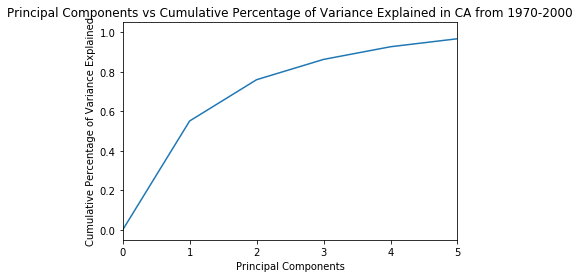

In [33]:
pca = PCA(n_components=365)
pca.fit(result_clean)

y = [0]

for v in pca.explained_variance_ratio_:
    y.append(v+y[-1])

import matplotlib.pyplot as plt
plt.plot(y)
plt.xlim(left=0, right=5)
plt.title('Principal Components vs Cumulative Percentage of Variance Explained in CA from 1970-2000')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Percentage of Variance Explained')
plt.show()

## smoothing for CA for only el nino years

In [34]:
ca_elnino = dca[(dca['Year'] == 1972)
               | (dca['Year'] == 1977)
               | (dca['Year'] == 1979)
               | (dca['Year'] == 1982)
               | (dca['Year'] == 1986)
               | (dca['Year'] == 1987)
               | (dca['Year'] == 1991)
               | (dca['Year'] == 1994)
               | (dca['Year'] == 1997)]
# ca_elnino.head()

ca_elnino_smoothed_pdf=Smoother(dca)
ca_elnino_smoothed_pdf.head()

def unpackData(row):
    row = row.to_frame()
    L = list(row.transpose()['Values'])
    asf = np.stack([unpackArray(v, np.float16) for v in L])
    return asf[0].tolist()

ca_elnino_smoothed_pdf['unpackedValues']=ca_elnino_smoothed_pdf.apply(lambda row: unpackData(row), axis=1)
ca_elnino_smoothed_pdf.head()

,ID,elevation,state,Station,Measurement,Year,Values,unpackedValues
0,USC00042239,1414.3,CA,USC00042239,smooth_SNOW,1970,"[112, 164, 187, 164, 7, 165, 85, 165, 164, 165...","[-0.017333984375, -0.0184783935546875, -0.0196..."
1,USC00042239,1414.3,CA,USC00042239,smooth_SNOW,1971,"[116, 63, 193, 63, 6, 64, 42, 64, 76, 64, 109,...","[1.86328125, 1.9384765625, 2.01171875, 2.08203..."
2,USC00042239,1414.3,CA,USC00042239,smooth_SNOW,1972,"[228, 38, 51, 39, 129, 39, 205, 39, 11, 40, 47...","[0.02691650390625, 0.0281219482421875, 0.02931..."
3,USC00042239,1414.3,CA,USC00042239,smooth_SNOW,1973,"[52, 73, 8, 73, 217, 72, 170, 72, 121, 72, 72,...","[10.40625, 10.0625, 9.6953125, 9.328125, 8.945..."
4,USC00042239,1414.3,CA,USC00042239,smooth_SNOW,1974,"[190, 68, 115, 68, 42, 68, 199, 67, 62, 67, 18...","[4.7421875, 4.44921875, 4.1640625, 3.888671875..."


In [35]:
# filter out nans
ca_elnino_smoothed_pdf_values = pd.DataFrame(smoothed_pdf.unpackedValues.tolist(), index=smoothed_pdf.index)
ca_elnino_smoothed_pdf_values.head()

result_clean = smoothed_pdf_values.copy()

remove = result_clean[result_clean.isnull().any(axis=1)]
# remove.head()

print(np.where(result_clean.values >= np.finfo(np.float64).max))

result_clean = result_clean.drop(result_clean.index[824])

print(np.where(result_clean.values >= np.finfo(np.float64).max))

(array([824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824,
       824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824,
       824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824,
       824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824,
       824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824,
       824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824,
       824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824, 824,
       824, 824, 824, 824, 824, 824, 824, 824, 824, 824]), array([250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262,
       263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275,
       276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288,
       289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301,
       302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314,
       315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327,
    

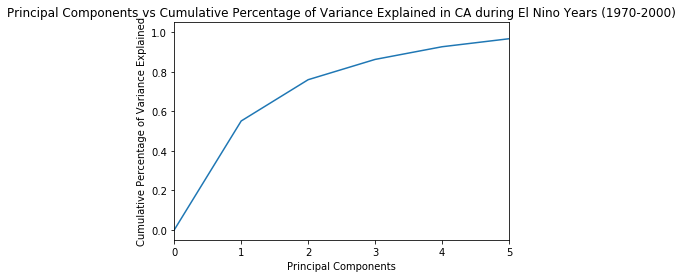

In [36]:
pca = PCA(n_components=365)
pca.fit(result_clean)

y = [0]

for v in pca.explained_variance_ratio_:
    y.append(v+y[-1])

import matplotlib.pyplot as plt
plt.plot(y)
plt.xlim(left=0, right=5)
plt.title('Principal Components vs Cumulative Percentage of Variance Explained in CA during El Nino Years (1970-2000)')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Percentage of Variance Explained')
plt.show()

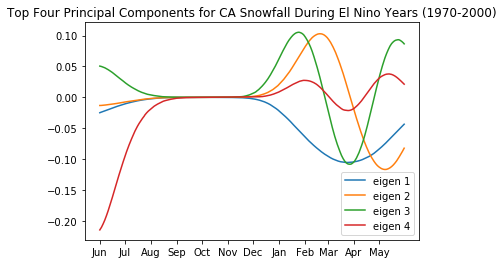

In [37]:
import matplotlib.pyplot as plt
plt.plot(pca.components_[0], label="eigen 1")
plt.plot(pca.components_[1], label="eigen 2")
plt.plot(pca.components_[2], label="eigen 3")
plt.plot(pca.components_[3], label="eigen 4")

monLen = [30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30]
xticks = [0]

for v in monLen:
    xticks.append(v+xticks[-1])
    
plt.xticks(xticks, ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'])
plt.title('Top Four Principal Components for CA Snowfall During El Nino Years (1970-2000)')
# top 4 components account for 0.92663897972823805 var explained
plt.legend()
plt.show()

Eigen 1: mean - indicates heavy/light snow
If coef_1 is higher, the snow accumulation is lower.

Eigen 2: early season
(positive in jan, feb, march, negative in apr, may)
If coef_2 is large, snowfall is higher earlier in the year. 

Eigen 3: longer season?? two large snow storm season?
(positive in dec, jan, feb, may, june, negative in may and apr)
If Coef_3 is high: season is long.

Eigen 4: very little snow, very short season. 
If Coef_4 is high: season is short.

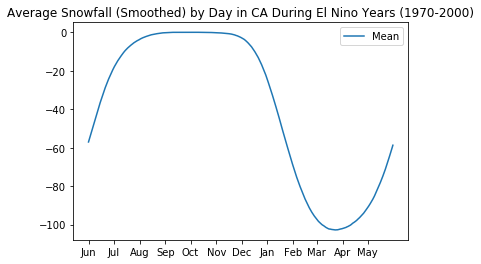

In [38]:
import matplotlib.pyplot as plt
meanSnowfall_byDay = result_clean.mean(axis=0).tolist()
plt.plot(meanSnowfall_byDay, label="Mean")

monLen = [30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30]
xticks = [0]

for v in monLen:
    xticks.append(v+xticks[-1])
  
plt.title('Average Snowfall (Smoothed) by Day in CA During El Nino Years (1970-2000)')
plt.xticks(xticks, ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'])
plt.legend()
plt.show()

In [46]:
pca.explained_variance_

array([  3.31747797e+06,   1.25717462e+06,   6.17789872e+05,
         3.85855933e+05,   2.43627001e+05,   8.65353901e+04,
         6.19977754e+04,   2.58899383e+04,   8.39807956e+03,
         8.00120408e+03,   3.51137606e+03,   1.22310745e+03,
         9.96036804e+02,   4.61975143e+02,   2.09594434e+02,
         1.58837168e+02,   7.82848309e+01,   3.73823951e+01,
         3.60270946e+01,   2.85884062e+01,   2.66744194e+01,
         2.35449430e+01,   2.22315571e+01,   2.19124057e+01,
         1.80452828e+01,   1.72457242e+01,   1.44128747e+01,
         1.27592926e+01,   1.24054195e+01,   1.16691527e+01,
         1.07289990e+01,   9.78724016e+00,   9.59334808e+00,
         8.87442799e+00,   8.11485667e+00,   7.58582541e+00,
         7.18616428e+00,   6.94098096e+00,   6.25392098e+00,
         5.88091567e+00,   5.43543009e+00,   5.24570662e+00,
         5.05879445e+00,   4.64364460e+00,   4.42380092e+00,
         4.31890068e+00,   4.24425298e+00,   4.04286434e+00,
         3.99323608e+00,

## save pca information into a pkl file

In [42]:
import pickle

# create dict and write to pkl file
mydict = {}
mydict['pca'] = pca
mydict['components_'] = pca.components_
mydict['explained_variance_'] = pca.explained_variance_
mydict['explained_variance_ratio_'] = pca.explained_variance_ratio_
# mydict['singular_values_'] = pca.singular_values_

# import os
# print(os.getcwd())

output = open('ca_elnino_smoothed_pca.pkl', 'wb')
pickle.dump(mydict, output)
output.close()

# read back from file to make sure it worked
pkl_file = open('ca_elnino_smoothed_pca.pkl', 'rb')
mydict2 = pickle.load(pkl_file)
pkl_file.close()

print(mydict)
print(mydict2)

/mnt/workspace/Public-DSC291/notebooks/Section2-PCA/Full_Dataset_analysis
{'explained_variance_ratio_': array([  5.51082818e-01,   2.08835549e-01,   1.02624158e-01,
         6.40964543e-02,   4.04700967e-02,   1.43748254e-02,
         1.02987598e-02,   4.30070684e-03,   1.39504690e-03,
         1.32911993e-03,   5.83292198e-04,   2.03176482e-04,
         1.65456643e-04,   7.67409960e-05,   3.48167772e-05,
         2.63852346e-05,   1.30042839e-05,   6.20977617e-06,
         5.98464044e-06,   4.74896280e-06,   4.43102091e-06,
         3.91116796e-06,   3.69299487e-06,   3.63997904e-06,
         2.99759196e-06,   2.86477330e-06,   2.39419453e-06,
         2.11950976e-06,   2.06072613e-06,   1.93842119e-06,
         1.78224756e-06,   1.62580730e-06,   1.59359892e-06,
         1.47417551e-06,   1.34799933e-06,   1.26011931e-06,
         1.19372960e-06,   1.15300098e-06,   1.03887002e-06,
         9.76908245e-07,   9.02906414e-07,   8.71390501e-07,
         8.40341587e-07,   7.71378974e-07,